In [1]:
%load_ext autoreload
%autoreload 2

In [82]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [74]:
DATA_PATH = os.path.join("data", "TOP500_202206.csv")
TOP_HIST = os.path.join("data", "fastest_list.csv")
REPORT_PATH = os.path.join("report", "data_report.html")

In [77]:
fastest_df = pd.read_csv(TOP_HIST)
fastest_df.head().T

,0,1,2,3,4
Year,1997,2000,2001,2002,2004
Name,ASCI Red,ASCI White,ASCI White,Earth Simulator,Blue Gene/L
Rmax,1.06,4.93,7.2,35.86,70.72
Type,TFLOPS,TFLOPS,TFLOPS,TFLOPS,TFLOPS


In [12]:
df = pd.read_csv(DATA_PATH)
df.shape

(500, 38)

## EDA

In [17]:
df.head().T

,0,1,2,3,4
Rank,1,2,3,4,5
Previous Rank,NaN,1.0,NaN,2.0,3.0
First Appearance,59,55,59,51,51
First Rank,1,1,3,1,3
Name,Frontier,Supercomputer Fugaku,LUMI,Summit,Sierra
Computer,"HPE Cray EX235a, AMD Optimized 3rd Generation ...","Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...","HPE Cray EX235a, AMD Optimized 3rd Generation ...","IBM Power System AC922, IBM POWER9 22C 3.07GHz...","IBM Power System AC922, IBM POWER9 22C 3.1GHz,..."
Site,DOE/SC/Oak Ridge National Laboratory,RIKEN Center for Computational Science,EuroHPC/CSC,DOE/SC/Oak Ridge National Laboratory,DOE/NNSA/LLNL
Manufacturer,HPE,Fujitsu,HPE,IBM,IBM / NVIDIA / Mellanox
Country,United States,Japan,Finland,United States,United States
Year,2021,2020,2022,2018,2018


In [5]:
report = ProfileReport(df, title="Profile Report")
report.to_file(REPORT_PATH)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/aslan/Documents/Github/MADE_HPC/venv/lib/python3.10/site-packages/pandas_profiling/model/correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Part 1

In [151]:
TARGET_YEAR = 2025

In [152]:
dates_lst = list(range(min(fastest_df['Year'].values), TARGET_YEAR + 1))

X_train = fastest_df[['Year']].values
y_train = fastest_df['Rmax'].values
X_pred = np.array([dates_lst]).T

lin_model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log,
    inverse_func=np.exp,
)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_pred)
print(f"Prediction for 2025: {y_pred[-1]} TFLOPS")

Prediction for 2025: 11137846.067049397 TFLOPS


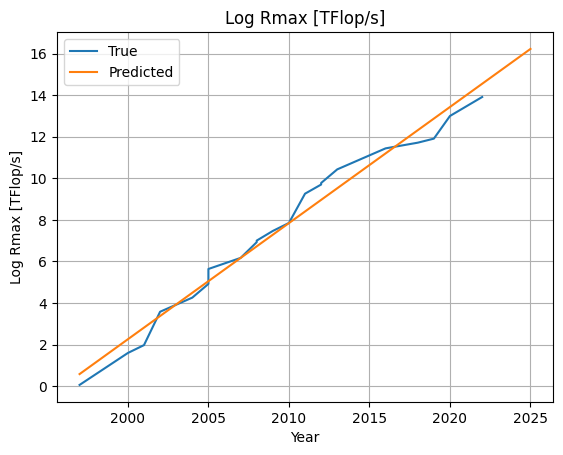

In [153]:
plt.plot(
    fastest_df['Year'], np.log(fastest_df['Rmax'].values),
    dates_lst, np.log(y_pred),
)
plt.title("Log Rmax [TFlop/s]")
plt.xlabel("Year")
plt.ylabel("Log Rmax [TFlop/s]")
plt.legend(["True", "Predicted"])
plt.grid()
plt.show()

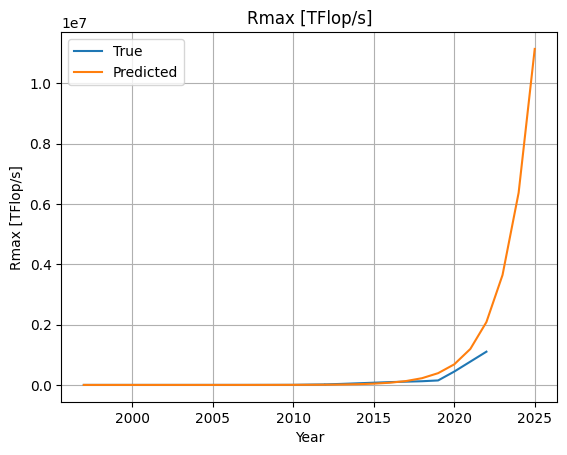

In [154]:
plt.plot(
    fastest_df['Year'], (fastest_df['Rmax'].values),
    dates_lst, y_pred,
)
plt.title("Rmax [TFlop/s]")
plt.xlabel("Year")
plt.ylabel("Rmax [TFlop/s]")
plt.legend(["True", "Predicted"])
plt.grid()
plt.show()

Используя линейную регрессию в логарифмической шкале, можно получить прогноз `11.13 EFLOP`
На графиках в логарифмической шкале наблюдается совпадение тренда, но при изученнии грфика в исходных шкалах кажется, что полученные значения не адекватны, так как такая модель предполагает взрывной рост в последующие несколько лет.
По этой причине также рассматривается линейная экстраполяция тренда последних лет как пример более адекватной оценки.

In [157]:
dates_lst = list(range(min(fastest_df['Year'].values[18:]), TARGET_YEAR + 1))

X_train = fastest_df.loc[fastest_df.index[18:], ['Year']].values 
y_train = fastest_df['Rmax'].values[18:]
X_pred = np.array([dates_lst]).T

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_pred)
print(f"Prediction for 2025: {y_pred[-1]} TFLOPS")

Prediction for 2025: 2055400.0000001192 TFLOPS


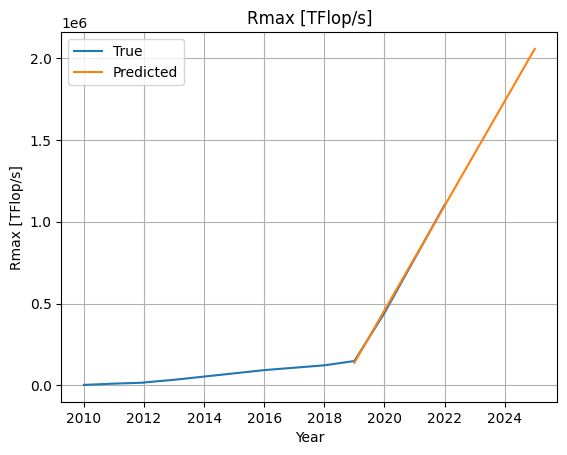

In [159]:
plt.plot(
    fastest_df['Year'].values[11:], (fastest_df['Rmax'].values[11:]),
    dates_lst, y_pred
)
plt.title("Rmax [TFlop/s]")
plt.xlabel("Year")
plt.ylabel("Rmax [TFlop/s]")
plt.legend(["True", "Predicted"])
plt.grid()
plt.show()

Данный метод дает более реалистичный прогноз `2.05 EFLOPS`

## Part 2

In [160]:
TOTAL_EL = 13_176 * 10 ** 12 # Watt-hours

In [170]:
consumption = df['Power (kW)']
consumption = consumption[consumption.notna()]
consumption = consumption.apply(
    lambda x: float(x.replace(',', '')) if isinstance(x, str) else x
)
consumption = consumption.sum()
consumption = consumption / TOTAL_EL * 100
print(f"Electricity consumption rate: {consumption}%")

Electricity consumption rate: 2.5841412416514875e-09%
